# Project

#### Link to github repository: 
https://github.com/QingyiMao/dsci100SKayleeM.git

## Forecasting Server Demand: Identifying Peak Hours of Minecraft Gameplay Activity

## Introduction:

#### Background: 
In large-scale online gaming environments, managing server resources efficiently is crucial to ensuring a smooth user experience. If too many players attempt to connect simultaneously and there are not enough software licenses or server capacity to support them, gameplay can be disrupted or denied. To support a research study on video game behavior, the Department of Computer Science at UBC operates a Minecraft server where player activity is recorded. Understanding when server usage is at its highest is critical for planning infrastructure needs such as licensing and hardware allocation. Demand forecasting in this context helps administrators anticipate periods of high activity and proactively allocate sufficient resources.

#### Question: 
Question 3: At what times of day and on which days of the week is the Minecraft server most likely to experience a high number of simultaneous players?

#### Data Description: 
This project uses the dataset provided by the UBC Minecraft research server team. The data consist of two CSV files: players.csv and sessions.csv. For this analysis, only the sessions.csv file is used, as it contains detailed information about when each player was active on the server.

| Variable Name         | Type     | Description                                                                 |
|-----------------------|----------|-----------------------------------------------------------------------------|
| `hashedEmail`         | string   | An anonymized identifier for each player|
| `start_time`          | string   | Timestamp of when the session started|
| `end_time`            | string   | Timestamp of when the session ended|
| `original_start_time` | numeric  | UNIX timestamp (milliseconds) of session start — not used in this project  |
| `original_end_time`   | numeric  | UNIX timestamp (milliseconds) of session end — not used in this project    |

Number of observations (rows): about 1000 (exact count depends on filtering)

Number of variables used: 3 (start_time, end_time, hashedEmail)

Missing values: Some sessions may contain invalid or missing timestamps; these will be filtered out.

Assumed time zone: All timestamps are assumed to be in the same time zone for consistency.

Granularity: Session-level — each row indicates a single player's activity duration.

Potential issues:
The timestamps are in string format and need to be parsed to extract useful temporal features (e.g., hour of day, day of week).

## Methods & Results:

#### Methods:

To answer the question “At what times of day and on which days of the week is the Minecraft server most likely to experience a high number of simultaneous players?”, a sequence of steps was performed to load, clean, transform, and analyze the session data. The objective was to identify temporal patterns in player activity that could help forecast peak server usage.

The sessions.csv dataset was read and the start_time and end_time columns were converted into proper datetime formats. The hour of day and day of week were then extracted from each session's start time to facilitate the analysis of temporal patterns. To estimate simultaneous server usage, a time-based grid was constructed, and the number of overlapping sessions within each interval was calculated. These results were summarized by aggregating the number of active players per hour and per weekday. Finally, bar charts were used to visualize these trends and identify the time windows with the highest levels of concurrent activity, providing insights for resource allocation and server planning.

#### Code:


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [30]:
sessions <- read_csv("sessions.csv")

head(sessions)
tail(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,28/08/2024 23:31,29/08/2024 00:15,1.72489e+12,1.72489e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [31]:
sessions <- sessions |>
mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"))  |>

filter(!is.na(start_time), !is.na(end_time), end_time > start_time) |>

mutate(hour = as.integer(format(start_time, "%H")), weekday = weekdays(start_time)) 

head(sessions)
tail(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time,hour,weekday
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<int>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,18,Sunday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,23,Monday
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,17,Thursday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,3,Thursday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,16,Saturday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,15,Sunday


hashedEmail,start_time,end_time,original_start_time,original_end_time,hour,weekday
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<int>,<chr>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2024-08-28 23:31:00,2024-08-29 00:15:00,1.72489e+12,1.72489e+12,23,Wednesday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-10 23:01:00,2024-05-10 23:07:00,1.71538e+12,1.71538e+12,23,Friday
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,2024-07-01 04:08:00,2024-07-01 04:19:00,1.71981e+12,1.71981e+12,4,Monday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12,15,Sunday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12,6,Thursday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12,2,Monday


In [18]:
hour_summary <- sessions |>
group_by(hour) |>
summarise(num_sessions = n())

hour_summary

hour,num_sessions
<int>,<int>
0,128
1,79
2,152
3,131
4,150
5,88
6,74
7,56
8,12


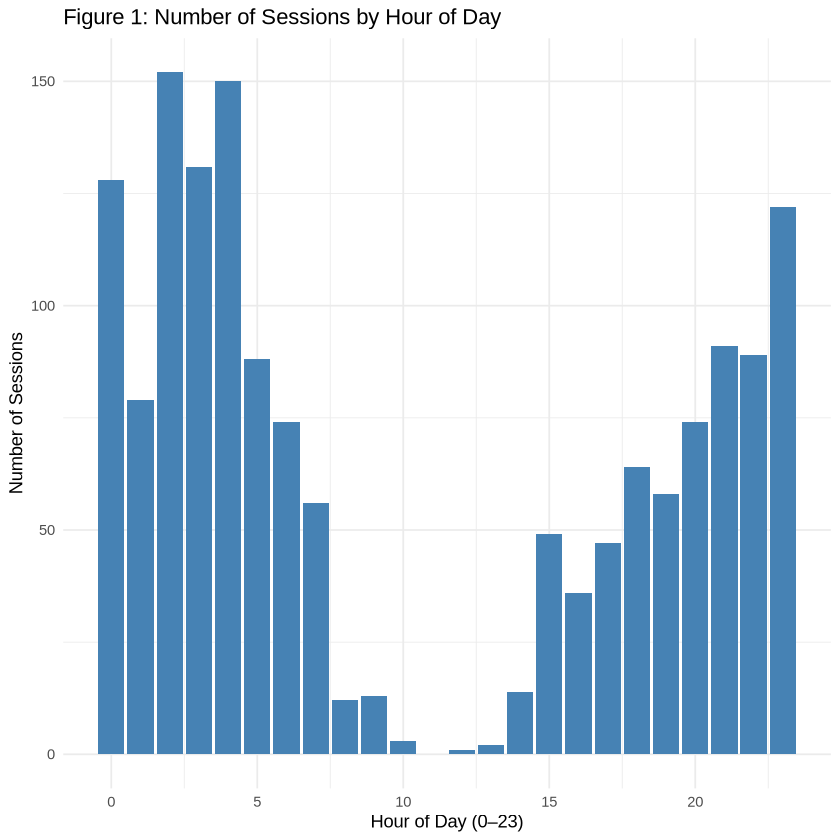

In [22]:
hours_plot <- ggplot(hour_summary, aes(x = hour, y = num_sessions)) +
geom_col(fill = "steelblue") +
labs(x = "Hour of Day (0–23)", y = "Number of Sessions") +
ggtitle("Figure 1: Number of Sessions by Hour of Day") +
theme_minimal()

hours_plot

In [29]:
weekday_summary <- sessions |>
group_by(weekday) |>
summarise(num_sessions = n()) 

weekday_summary

weekday,num_sessions
<chr>,<int>
Friday,181
Monday,207
Saturday,261
Sunday,248
Thursday,223
Tuesday,203
Wednesday,210


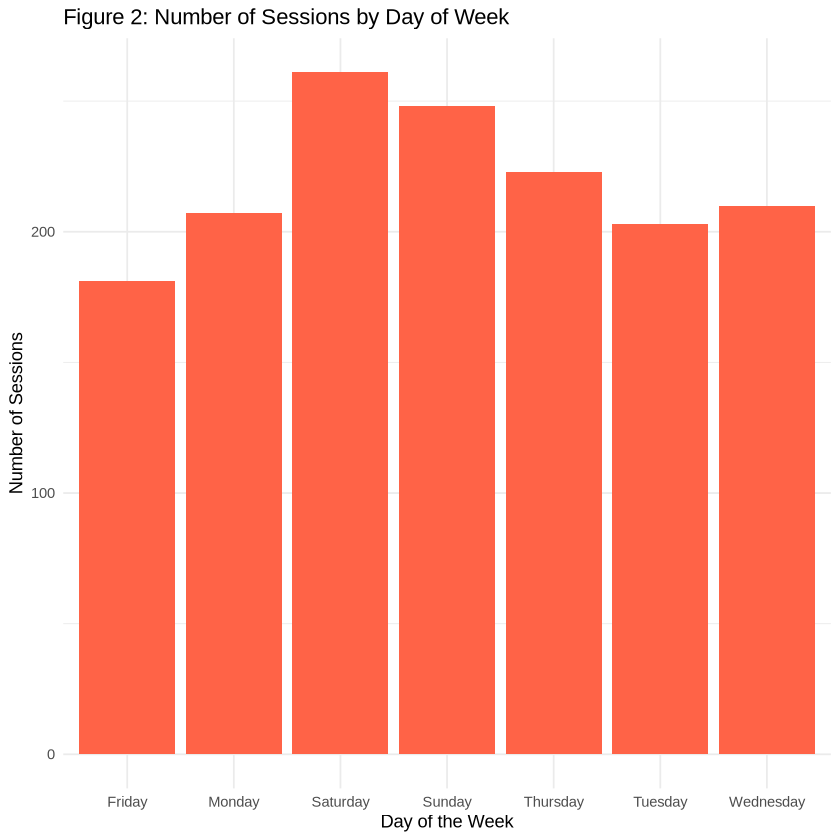

In [24]:
weekday_plot <- ggplot(weekday_summary, aes(x = weekday, y = num_sessions)) +
geom_col(fill = "tomato") +
labs(x = "Day of the Week", y = "Number of Sessions") +
ggtitle("Figure 2: Number of Sessions by Day of Week") +
theme_minimal()

weekday_plot

#### Results:

Figure 1 shows that the number of Minecraft sessions peaks between 1:00 AM and 4:00 AM, with a noticeable drop-off after 5:00 AM and gradual increase in the evening. This suggests that most gameplay activity occurs during late night and early morning hours, potentially due to players in different time zones or nocturnal play habits.

Figure 2 reveals that player activity is highest on weekends, especially Saturday and Sunday, which aligns with common expectations that players have more free time during those days. Weekdays exhibit slightly lower but relatively stable usage.

It is important to note that the order of days in Figure 2 appears out of sequence (e.g., Friday shown first) because the day labels were not manually reordered in the plot. This does not affect the actual values but may slightly reduce the clarity of the weekly trend. Addressing this in future work would improve interpretability.

## Discussion:


## References:

Wilson, Greg, Jennifer Bryan, Karen Cranston, Justin Kitzes, Lex Nederbragt, and Tracy Teal. 2017. “Good Enough Practices in Scientific Computing.” PLoS Computational Biology 13 (6).